### Importing Libraries


In [128]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.naive_bayes import GaussianNB



### Read Data from csv file



In [129]:
heartdf = pd.read_csv('heart_disease_dataset.csv')
heartdf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


### Dividing of result data and features

In [130]:
# X=heartdf.drop(columns=['num'])
# y=heartdf.num
Features = heartdf.loc[:, heartdf.columns != 'num']
result = heartdf['num']


###  Dividing data into test and learning data  

In [131]:
Features_train,Features_test,result_train,result_test=train_test_split(Features,result,test_size=0.25)

### trainin dicition tree

In [132]:
DecisionTree = DecisionTreeClassifier(criterion='entropy')
DecisionTree.fit(Features_train,result_train)

DecisionTreeClassifier(criterion='entropy')

### اماده سازی برای کانفیوژن ماتریس

In [133]:
result_pred=DecisionTree.predict(Features_test)
report_decisiontree=classification_report(result_test,result_pred)
print(report_decisiontree)



              precision    recall  f1-score   support

           0       0.71      0.69      0.70        39
           1       0.68      0.70      0.69        37

    accuracy                           0.70        76
   macro avg       0.70      0.70      0.70        76
weighted avg       0.70      0.70      0.70        76



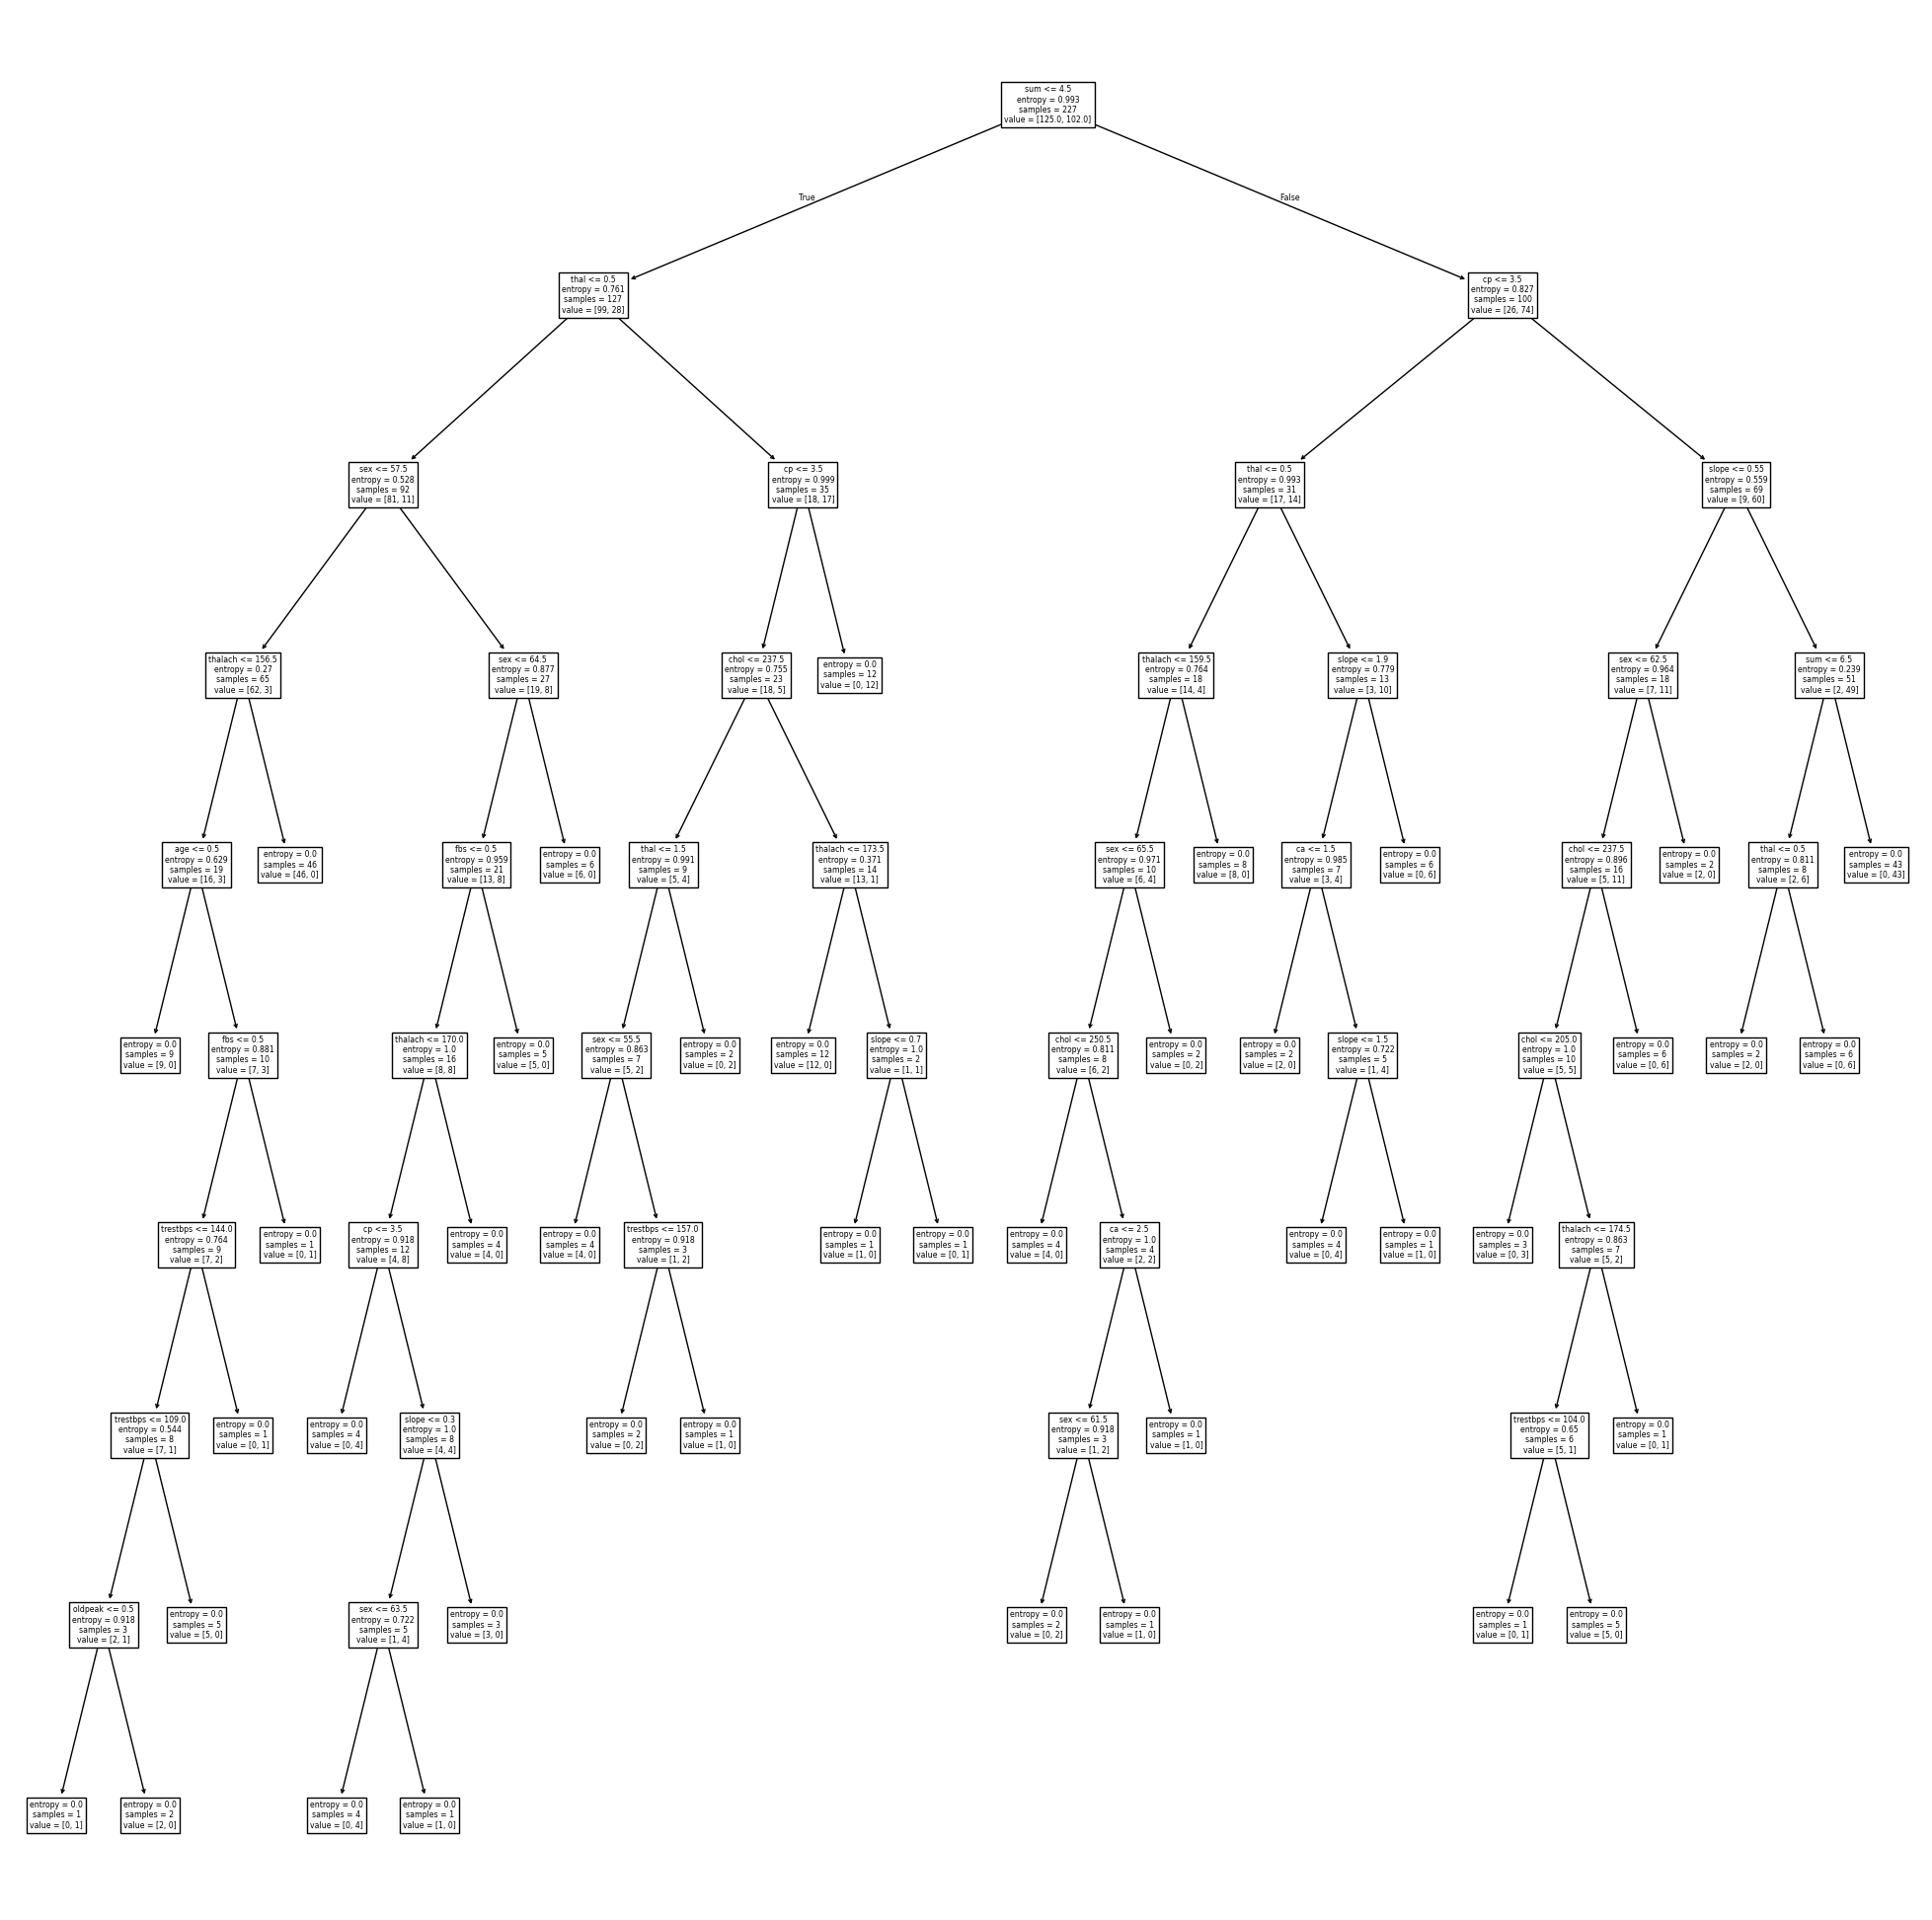

In [134]:
fig, ax = plt.subplots(figsize=(25, 25))
tree.plot_tree(DecisionTree,ax=ax,feature_names=['sex','age','cp','trestbps','chol','fbs','restceg','thalach','oldpeak','slope','ca','thal','sum'])
plt.show()

<Figure size 1000x1000 with 0 Axes>

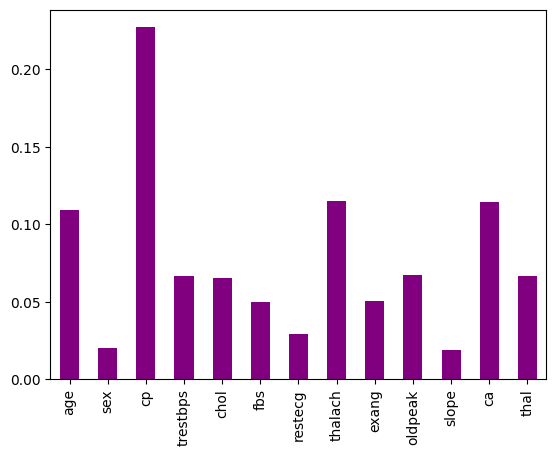

<Figure size 1000x1000 with 0 Axes>

In [135]:
feature_importances=pd.Series(De.feature_importances_,index=Features_train.columns)
feature_importances.plot(kind='bar',color='purple')
plt.figure(figsize=[10,10])

### train naive byse

In [136]:
NB=GaussianNB()
NB.fit(Features_train,result_train)

GaussianNB()

### checking accurisy

In [137]:
cross_val_score(NB,Features_train,result_train,cv=7,scoring='accuracy')

array([0.81818182, 0.75757576, 0.45454545, 0.71875   , 0.78125   ,
       0.6875    , 0.75      ])

### ماتریس کانفیوژن

In [138]:
result_pred=NB.predict(Features_test)
report_decisiontree=classification_report(result_test,result_pred)

In [139]:
print(report_decisiontree)

              precision    recall  f1-score   support

           0       0.80      0.90      0.84        39
           1       0.88      0.76      0.81        37

    accuracy                           0.83        76
   macro avg       0.84      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76

